This is cell of code is used to get my data from a website which updates daily, and then convert it to a dataframe. It is a 2d array.



In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import math
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from datetime import datetime
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")


import plotly.offline as pyoff
import plotly.graph_objs as go
pyoff.init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')

#Gets the data needed, then converts it into the required form
response = requests.get("https://sky.coflnet.com/command/pricerdicer/eyJuYW1lIjoiQk9PU1RFUl9DT09LSUUiLCJzdGFydCI6MH0=")
contents = response.text
contents = json.loads(contents)
data = contents["prices"]
df = pd.DataFrame(data)
df = pd.DataFrame.from_dict(data)
df = pd.DataFrame.from_records(data)

df.time = pd.to_datetime(df.time)
df.time = df["time"].dt.strftime("%Y-%m-%d")


df.index = df.time
df.drop(columns=['volume', 'min', 'max', 'time'], inplace=True)
df



,avg
time,
2020-09-08,1882120
2020-09-09,1227820
2020-09-10,961632
2020-09-11,954272
2020-09-12,946214
...,...
2022-03-12,3073540
2022-03-13,3031650
2022-03-13,3032510


This code cell is used to filter through the data, and find out the length of the dataset, filtering only through the parts i want.

In [2]:
#some simple variables which will be used more later
dataset = df.values
training_data_len = len(dataset)


\In this next cell, i scale the data down into values between 0 and 1, so that it's easier for hte model to predict. 

1.   List item
2.   List item



In [3]:
#Scaling the data from 0 to 1 for computer's ease of use
train = df

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)


In [5]:
#more variables, and the timeseriesgenerator which i will use later
n_input = 30
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [7]:
#the model i will use
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
history = model.fit_generator(generator, epochs=100, verbose=1)

Epoch 1/100
167/167 [==============================] - 9s 45ms/step - loss: 0.0233
Epoch 2/100
167/167 [==============================] - 10s 57ms/step - loss: 0.0030
Epoch 3/100
167/167 [==============================] - 11s 63ms/step - loss: 0.0045
Epoch 4/100
167/167 [==============================] - 12s 70ms/step - loss: 0.0027
Epoch 5/100
167/167 [==============================] - 7s 43ms/step - loss: 0.0026
Epoch 6/100
167/167 [==============================] - 10s 59ms/step - loss: 0.0029
Epoch 7/100
167/167 [==============================] - 15s 91ms/step - loss: 0.0027
Epoch 8/100
167/167 [==============================] - 9s 55ms/step - loss: 0.0024
Epoch 9/100
167/167 [==============================] - 7s 42ms/step - loss: 0.0022
Epoch 10/100
167/167 [==============================] - 7s 43ms/step - loss: 0.0020
Epoch 11/100
167/167 [==============================] - 7s 43ms/step - loss: 0.0021
Epoch 12/100
167/167 [==============================] - 7s 44ms/step - loss: 0.0

In [ ]:
#plotting loss
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_data = [
    go.Scatter(
        x=hist['epoch'],
        y=hist['loss'],
        name='loss'
    )
    
]

plot_layout = go.Layout(
        title='Training loss'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [ ]:
#predicting
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [ ]:
#getting the future dates for the graph which is used to plot predictions
from pandas.tseries.offsets import DateOffset
df.index = pd.to_datetime(df.index)
add_dates = [df.index[-1] + DateOffset(days = x) for x in range (0,n_input + 5)]




future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [ ]:
#plotting
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict])

plt.plot(df_predict)
plt.xticks(rotation=90)
plt.show

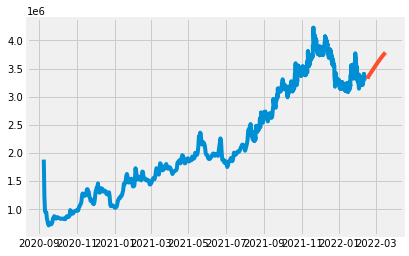

In [ ]:
plt.plot(df_proj)
plt.show()

In [ ]:
df_predict
df_predict.to_csv()

',Prediction\n2022-01-29,3470779.5094884634\n2022-01-30,3483626.301261425\n2022-01-31,3496931.0540730953\n2022-02-01,3510139.857133746\n2022-02-02,3523233.8556888103\n2022-02-03,3536198.803923726\n2022-02-04,3549027.5789312124\n2022-02-05,3561713.4767985344\n2022-02-06,3574251.8885856867\n2022-02-07,3586638.205352664\n2022-02-08,3598870.3321267366\n2022-02-09,3610945.335946083\n2022-02-10,3622861.1218379736\n2022-02-11,3634616.8518133163\n2022-02-12,3646212.1068775654\n2022-02-13,3657646.468036175\n2022-02-14,3668919.0973000526\n2022-02-15,3680030.413663745\n2022-02-16,3690979.9981327057\n2022-02-17,3701770.3646742105\n2022-02-18,3712400.6752991676\n2022-02-19,3722871.767996669\n2022-02-20,3733185.318744898\n2022-02-21,3743332.947652936\n2022-02-22,3753303.341868043\n2022-02-23,3763090.2164720297\n2022-02-24,3772691.4764921665\n2022-02-25,3782107.5409229994\n2022-02-26,3791340.504737258\n2022-02-27,3800392.043913126\n'